In [22]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/hpc-rosneft/drigo/surrogate/src/')
import glob
import numpy as np
from tqdm import tqdm

# plotting settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 1200
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 7]
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

from feature_table import FeatureTable
from dataset import DataLoader, load_features
import cfg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear regression 1 point


## 1
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 2
- **dy** : 2
- **dt** : 0

In [23]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=2, dy=2, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)
reg = LinearRegression()
reg.fit(X=X, y=y)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft,
                               clean=False)
pred = reg.predict(X_test)
mse_val = mse(y_pred=pred[~np.isnan(y_test)], y_true=y_test[~np.isnan(y_test)])

(1461, 25)
(1461, 25)
(730, 25)
(730, 25)


Text(0, 0.01, 'MSE=0.07398')

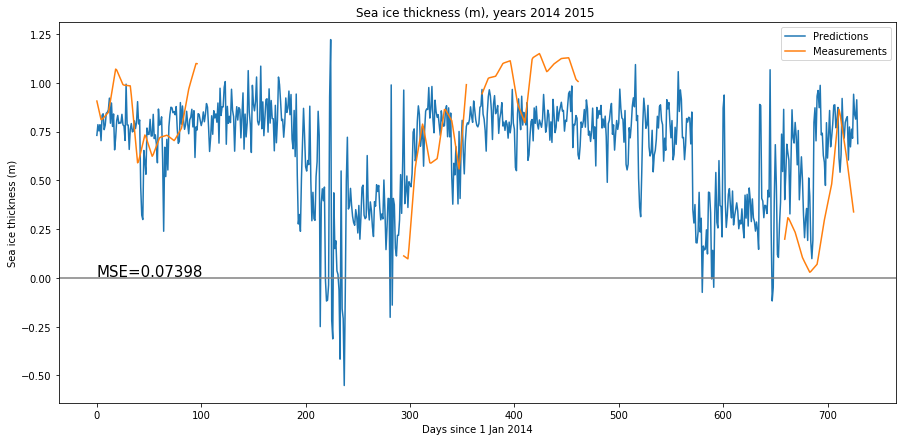

In [24]:
plt.plot(pred, label='Predictions')
plt.plot(y_test, label='Measurements')
plt.axhline(y=0, color='grey', linestyle='-')
plt.xlabel('Days since 1 Jan {}'.format(years_test[0]))
plt.ylabel('Sea ice thickness (m)')
plt.legend()
plt.title('Sea ice thickness (m), years {}'.format(''.join((str(e)+' ' for e in years_test))))
plt.text(s='MSE={}'.format(round(mse_val, 5)),x=0, y=0.01, size=15)

## 2
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 10
- **dy** : 10
- **dt** : 0

In [25]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=10, dy=10, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)
reg = LinearRegression()
reg.fit(X=X, y=y)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft,
                               clean=False)
pred = reg.predict(X_test)
mse_val = mse(y_pred=pred[~np.isnan(y_test)], y_true=y_test[~np.isnan(y_test)])

(1461, 441)
(1461, 441)
(730, 441)
(730, 441)


Text(0.5, 1.0, 'Sea ice thickness (m), years 2014 2015 ')

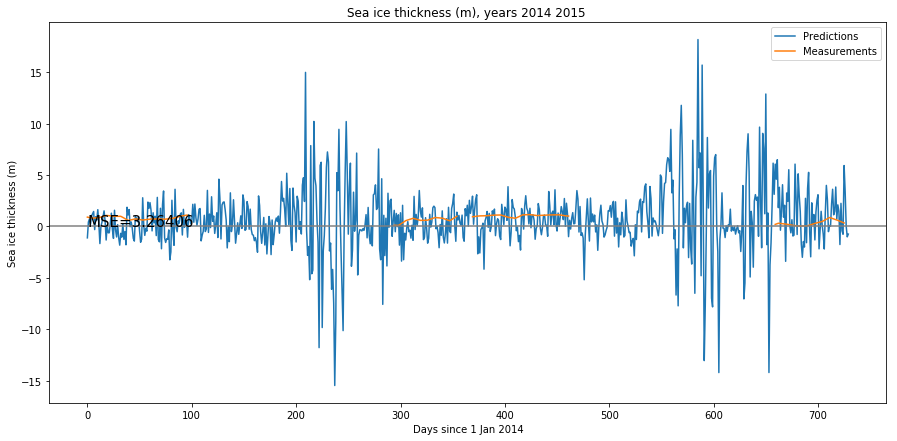

In [26]:
plt.plot(pred, label='Predictions')
plt.plot(y_test, label='Measurements')
plt.axhline(y=0, color='grey', linestyle='-')
plt.xlabel('Days since 1 Jan {}'.format(years_test[0]))
plt.ylabel('Sea ice thickness (m)')
plt.legend()
plt.text(s='MSE={}'.format(round(mse_val, 5)),x=0, y=0.01, size=15)
plt.title('Sea ice thickness (m), years {}'.format(''.join((str(e)+' ' for e in years_test))))

## 3
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature
- **y test** : sat ice thickness
- **dx** : 0
- **dy** : 0
- **dt** : 0

In [27]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=0, dy=0, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)
reg = LinearRegression()
reg.fit(X=X, y=y)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft,
                               clean=False)
pred = reg.predict(X_test)
mse_val = mse(y_pred=pred[~np.isnan(y_test)], y_true=y_test[~np.isnan(y_test)])

(1461, 1)
(1461, 1)
(730, 1)
(730, 1)


Text(0, 0.01, 'MSE=0.06643')

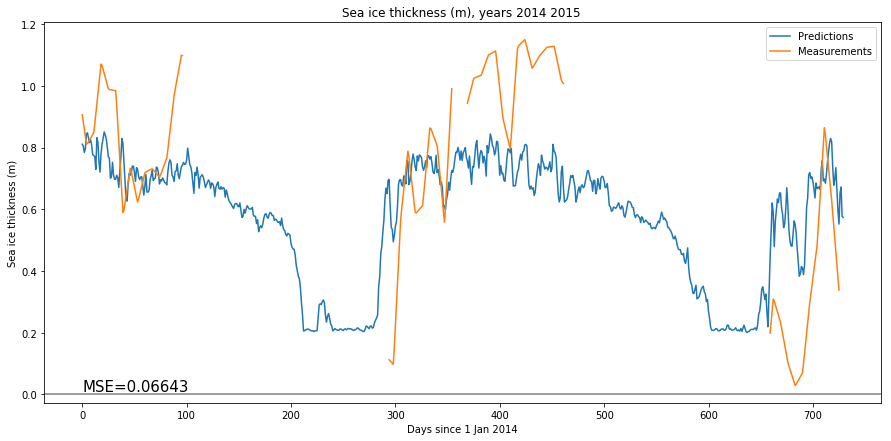

In [29]:
plt.plot(pred, label='Predictions')
plt.plot(y_test, label='Measurements')
plt.axhline(y=0, color='grey', linestyle='-')
plt.xlabel('Days since 1 Jan {}'.format(years_test[0]))
plt.ylabel('Sea ice thickness (m)')
plt.legend()
plt.title('Sea ice thickness (m), years {}'.format(''.join((str(e)+' ' for e in years_test))))
plt.text(s='MSE={}'.format(round(mse_val, 5)),x=0, y=0.01, size=15)

## 4
- **Years train**: 2010-2013
- **Years test** : 2014-2015
- **X train**: sat ice concentration, 2m air temperature, radsw, radlw
- **y test** : sat ice thickness
- **dx** : 2
- **dy** : 2
- **dt** : 0

In [30]:
years_train = list(range(2010,2014))
years_test = [2014, 2015]
X_vars = ['ice_conc', 'tair', 'radsw', 'radlw']
y_var = 'Thickness'
point = (109, 203) # approximately 80N 80E Kara Sea
ft = FeatureTable(dx=10, dy=10, dt=0)

y, X = load_features(X_vars=X_vars,
                     y_var=y_var,
                     years=years_train,
                     point=point,
                     feature_table=ft)
reg = LinearRegression()
reg.fit(X=X, y=y)

y_test, X_test = load_features(X_vars=X_vars,
                               y_var=y_var,
                               years=years_test,
                               point=point,
                               feature_table=ft,
                               clean=False)
pred = reg.predict(X_test)
mse_val = mse(y_pred=pred[~np.isnan(y_test)], y_true=y_test[~np.isnan(y_test)])

(1461, 441)
(1461, 441)
(1461, 441)
(1461, 441)
(730, 441)
(730, 441)
(730, 441)
(730, 441)


Text(0, 0.01, 'MSE=11465.63588')

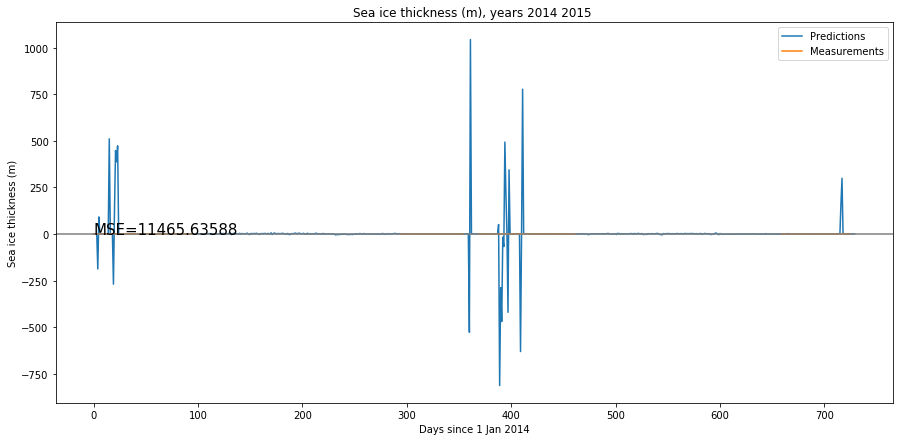

In [31]:
plt.plot(pred, label='Predictions')
plt.plot(y_test, label='Measurements')
plt.axhline(y=0, color='grey', linestyle='-')
plt.xlabel('Days since 1 Jan {}'.format(years_test[0]))
plt.ylabel('Sea ice thickness (m)')
plt.legend()
plt.title('Sea ice thickness (m), years {}'.format(''.join((str(e)+' ' for e in years_test))))
plt.text(s='MSE={}'.format(round(mse_val, 5)),x=0, y=0.01, size=15)